In [15]:
import pandas as pd
import os

# Retrieves current working directory to locate physical csv on disk
file_path = os.path.join(os.getcwd(), "SpotifyFeatures.csv")

#Loading in csv Spotify dataset
df = pd.read_csv(file_path) # read in the csv file

# Data Import Check
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [16]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [18]:
df.keys()

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [19]:
pd.unique(df['key'])

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

## Feature Engineering

There are 3 categorical variables (**key, mode, and time signature**) that need to be converted from text to numbers
using Pandas [astype("category")](https://pandas-docs.github.io/pandas-docs-travis/user_guide/categorical.html).
We also define popularity as a binary variable. For our purposes, we will define above 57 as "popular" since that's the
border of the top 25% of songs and encode that as 1, and below 57 as "not popular" and encode that as 0.

**Key**: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1,
and so on and so forth.

**Mode**: We will assign major=1 and minor=0.

**Time-Signature**: We will assign time signature from 0 to 4 since there are 5 unique values.

In [43]:
df["key"].astype('category')

0          0
1          1
2          2
3          0
4          3
          ..
232720     8
232721     5
232722     8
232723    10
232724     7
Name: key, Length: 232725, dtype: category
Categories (12, int64): [0, 1, 2, 3, ..., 8, 9, 10, 11]

In [ ]:
df["key"] = df["key"].astype('category')

In [44]:
df["mode"].astype('category')

0         1
1         0
2         0
3         1
4         1
         ..
232720    1
232721    0
232722    1
232723    1
232724    0
Name: mode, Length: 232725, dtype: category
Categories (2, int64): [0, 1]

In [45]:
df["mode"] = df["mode"].astype('category')


In [46]:
df["time_signature"].astype('category')

0         0
1         0
2         1
3         0
4         0
         ..
232720    0
232721    0
232722    0
232723    0
232724    0
Name: time_signature, Length: 232725, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [47]:
df["time_signature"] = df["time_signature"].astype('category')


In [48]:
# We'll transform our classification category as well
df["genre"] = df["genre"].astype('category')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   genre             232725 non-null  category
 1   artist_name       232725 non-null  object  
 2   track_name        232725 non-null  object  
 3   track_id          232725 non-null  object  
 4   popularity        232725 non-null  int64   
 5   acousticness      232725 non-null  float64 
 6   danceability      232725 non-null  float64 
 7   duration_ms       232725 non-null  int64   
 8   energy            232725 non-null  float64 
 9   instrumentalness  232725 non-null  float64 
 10  key               232725 non-null  category
 11  liveness          232725 non-null  float64 
 12  loudness          232725 non-null  float64 
 13  mode              232725 non-null  category
 14  speechiness       232725 non-null  float64 
 15  tempo             232725 non-null  float64 
 16  ti

In [51]:
# Popularity
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 0]


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,0,0.3460,-1.828,1,0.0525,166.969,0,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0,0.24600,0.590,137373,0.737,0.000000,1,0.1510,-5.559,0,0.0868,174.003,0,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0,0.95200,0.663,170267,0.131,0.000000,2,0.1030,-13.879,0,0.0362,99.488,1,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,0,0.0985,-12.178,1,0.0395,171.758,0,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0,0.95000,0.331,82625,0.225,0.123000,3,0.2020,-21.150,1,0.0456,140.576,0,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,0,0.00384,0.687,326240,0.714,0.544000,8,0.0845,-10.626,1,0.0316,115.542,0,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0,0.03290,0.785,282447,0.683,0.000880,5,0.2370,-6.944,0,0.0337,113.830,0,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,0,0.90100,0.517,166960,0.419,0.000000,8,0.0945,-8.282,1,0.1480,84.135,0,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,0,0.26200,0.745,222442,0.704,0.000000,10,0.3330,-7.137,1,0.1460,100.031,0,0.489


In [26]:
df.loc[df['popularity']== 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.08300,0.724,246333,0.689,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.32300,0.685,186467,0.610,0.000000,2,0.1020,-5.221,0,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.06750,0.762,199520,0.520,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.36000,0.563,240597,0.366,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.59600,0.653,213947,0.621,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230312,Soul,James Brown,Get Up (I Feel Like Being A) Sex Machine - Pts...,6hpmTwgNCz81H2bFEREx29,1,0.27300,0.833,318800,0.661,0.000149,9,0.2940,-7.595,0,0.1010,108.314,0,0.8580
230782,Soul,Alex Hepburn,If You Stay,4sJoIeb8zWYCLHSLM0az3b,1,0.04530,0.719,194554,0.702,0.000013,11,0.0662,-4.577,1,0.0357,116.938,0,0.6130
230817,Soul,Paloma Faith,Make Your Own Kind of Music,5jsFFhABp2FkasGr4QcQd6,1,0.00862,0.567,163840,0.753,0.001830,5,0.1270,-4.823,1,0.0406,120.098,0,0.5660
230946,Soul,James Brown,Papa's Got A Brand New Bag - Pt. 1,5aZzmPUv5a2nna9sxBrmpL,1,0.51900,0.775,128973,0.725,0.054100,5,0.0944,-8.369,1,0.0944,129.681,0,0.9140


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

**For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.**

In [29]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]


In [52]:
training = df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = df.drop(training.index)[features]

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

# Logistic Regression

In [32]:
# Logistic Regression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.7895316360511333
AUC: 0.5


# Random Forest Classifier

In [33]:
# Random Forest Classifier
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.9214469867869803
AUC: 0.833459224557254


Feature: 0, Score: 0.11530
Feature: 1, Score: 0.10770
Feature: 2, Score: 0.10860
Feature: 3, Score: 0.10647
Feature: 4, Score: 0.08794
Feature: 5, Score: 0.05013
Feature: 6, Score: 0.09767
Feature: 7, Score: 0.01222
Feature: 8, Score: 0.10481
Feature: 9, Score: 0.09811
Feature: 10, Score: 0.00695
Feature: 11, Score: 0.10411


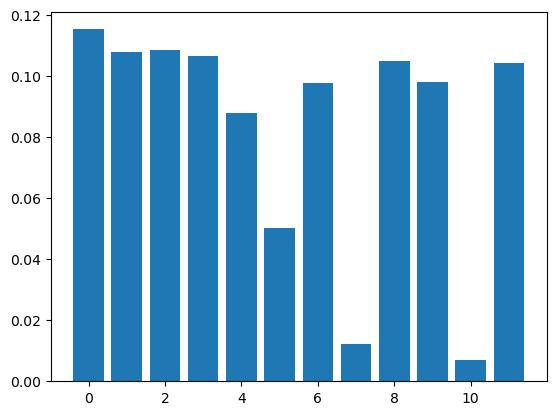

In [34]:
# random forest for feature importance on a regression problem

#Trying to show the feature name instead of feature 1 , feature 2. Please try if you can show the feature name in the plot

from matplotlib import pyplot
importance = RFC_Model.feature_importances_
importance
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# K-Nearest Neighbor Classifier

In [35]:
# K-Nearest Neighbor
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7736330432914383
AUC: 0.6156631913174396


# Decision Tree Classifier

In [36]:
# Decision Tree Classifier
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.8510044043398861
AUC: 0.8110285286807968


# Linear Support Vector Classification

In [37]:
# Linear Support Vector Classification
training_LSVC = training.sample(10000)
X_train_LSVC = training_LSVC[features]
y_train_LSVC = training_LSVC['popularity']
X_test_LSVC = df.drop(training_LSVC.index)[features]
X_train_LSVC, X_valid_LSVC, y_train_LSVC, y_valid_LSVC = train_test_split(
    X_train_LSVC, y_train_LSVC, test_size = 0.2, random_state = 420)

LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train_LSVC, y_train_LSVC)
LSVC_Predict = LSVC_Model.predict(X_valid_LSVC)
LSVC_Accuracy = accuracy_score(y_valid_LSVC, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy))

LSVC_AUC = roc_auc_score(y_valid_LSVC, LSVC_Predict) 
print("AUC: " + str(LSVC_AUC))

Accuracy: 0.7085
AUC: 0.5724690688300172


In [54]:
print(X_train.dtypes)

acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
mode                category
speechiness          float64
tempo                float64
time_signature      category
valence              float64
dtype: object


# XGB Classifier

In [57]:
XGB_Model = XGBClassifier(objective = "binary:logistic",
                          n_estimators = 10,
                          seed = 123,
                          enable_categorical=True,
                          use_label_encoder=False)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_valid)
XGB_Accuracy = accuracy_score(y_valid, XGB_Predict)
print("Accuracy: " + str(XGB_Accuracy))

XGB_AUC = roc_auc_score(y_valid, XGB_Predict) 
print("AUC: " + str(XGB_AUC))

ValueError: Experimental support for categorical data is not implemented for current tree method yet.

In [ ]:
#  GENRE CLASSIFICATION 
from sklearn.model_selection import train_test_split
import time

X = df.drop(columns=['genre'])
y = df['genre']
random_state = 11
test_size = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
y_train.value_counts().sort_index()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', max_iter=200)

In [ ]:
#model.fit(X_train, y_train)